# <font color=#1E90FF> Random Forest for getting the segment or attributes causes high sale.</font>

In [119]:
#loading the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [2]:
#loading the data
company_data= pd.read_csv('Company_Data (1).csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [4]:
company_data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [5]:
company_data['ShelveLoc']=company_data['ShelveLoc'].map({'Medium':0,'Bad':1,'Good':2})
company_data['Urban']=company_data['Urban'].map({"Yes":1,"No":1})
company_data['US']=company_data['US'].map({"Yes":1,"No":0})
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,0,59,12,1,1
3,7.40,117,100,4,466,97,0,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,0,55,11,1,1
397,7.41,162,26,12,368,159,0,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [101]:
#top sales
company_data.sort_values(by='Sales',ascending=False).head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
376,16.27,141,60,19,319,92,2,44,11,1,1
316,15.63,122,36,5,369,72,2,35,10,1,1
25,14.90,139,32,0,176,82,2,54,11,1,0
367,14.37,95,106,0,256,53,2,52,17,1,0
18,13.91,110,110,0,408,68,2,46,17,1,1
30,13.55,125,94,0,447,89,2,30,12,1,0
352,13.44,133,103,14,288,122,2,61,17,1,1
68,13.39,149,69,20,366,134,2,60,13,1,1
357,13.36,103,73,3,276,72,0,34,15,1,1
193,13.28,139,70,7,71,96,2,61,10,1,1


In [7]:
# our target variable is sales 
X=company_data.drop('Sales',axis=1)
Y=company_data['Sales']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

## <font color=#1E90FF>Hyper parameter Tuning </font>

In [9]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid =[
    {
    
    'n_estimators':[3,10,30,100,1200],'max_features':[2,4,6,8],'max_depth':[3,4,6]},
    {
    
    'bootstrap':[False,True],'max_features':[2,3,4,6,8],'n_estimators':[3,10,30,100,120],'max_depth':[3,4,6,8]},
]
                         
    
    
                          


In [81]:
RF_params= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,n_jobs=4)
RF_params.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid=[{'max_depth': [3, 4, 6], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100, 1200]},
                         {'bootstrap': [False, True], 'max_depth': [3, 4, 6, 8],
                          'max_features': [2, 3, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100, 120]}])

In [82]:
RF_params.best_params_,RF_params.best_score_

({'bootstrap': True, 'max_depth': 8, 'max_features': 8, 'n_estimators': 120},
 0.6521508300196655)

## <font color=#1E90FF>Model building</font>

In [89]:
RF_regressor= RandomForestRegressor(n_estimators=1200,bootstrap=True)
RF_regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1200)

In [90]:
pred_on_train_data = RF_regressor.predict(X_train)
mae_on_train_data = mean_absolute_error(Y_train,pred_on_train_data)
mae_on_train_data

0.4590472135416695

In [91]:
score_on_train_data=r2_score(Y_train,pred_on_train_data)*100
score_on_train_data=str(score_on_train_data)
print("The accuracy on train data is: " +score_on_train_data + " %")

The accuracy on train data is: 95.78492707553843 %


In [92]:
pred_on_test_data=RF_regressor.predict(X_test)

In [93]:
mae_on_test_data= mean_absolute_error(Y_test,pred_on_test_data)
mae_on_test_data

1.373359270833335

In [94]:
from sklearn.metrics import r2_score
score_on_test_data=r2_score(Y_test,pred_on_test_data)*100
score_on_test_data=str(score_on_test_data)
print("The accuracy on test data is: " +score_on_test_data + " %")

The accuracy on test data is: 68.08941735246776 %


In [99]:
#model validataion
#cross val score
kfold= KFold(n_splits=10)
cross_val_score(RF_regressor,X,Y,cv=kfold).mean()*100

68.61437111118633

### <font color=#1E90FF>Checking for correalation.</font>

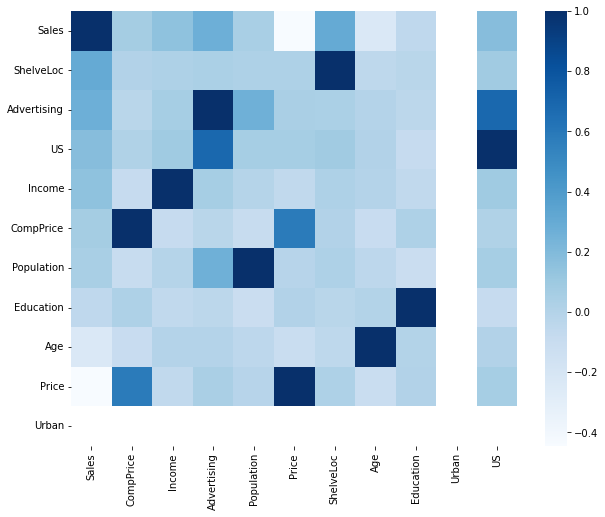

In [110]:
corr=company_data.corr().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Blues');

> The most important attrubutes are Shelf Location at sores,
followed by Advertising,US and Income.

In [115]:
#converting the sales variable into categorical feature.
def get_categorical_data(X):
    sales_status=[]
    for i in X:
        if i>=9:
            sales_status.append('1')
        elif (i<9):
            sales_status.append('0')
    return sales_status

In [117]:
company_data['sales_status']=get_categorical_data(company_data['Sales'])

In [118]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,1,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,0,59,12,1,1,1
3,7.40,117,100,4,466,97,0,55,14,1,1,0
4,4.15,141,64,3,340,128,1,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,1
396,6.14,139,23,3,37,120,0,55,11,1,1,0
397,7.41,162,26,12,368,159,0,40,18,1,1,0
398,5.94,100,79,7,284,95,1,50,12,1,1,0


- <font color=#1E90FF>The 1 in sales_status represent sales higher or equal to 9 thousands.</font>
- <font color=#1E90FF>The 0 represents sales less than 9 thousands.</font>

In [123]:
X_new = company_data.drop(columns=['Sales','sales_status'])
Y_new = company_data['sales_status']
X_new_train,X_new_test,Y_new_train,Y_new_test = train_test_split(X_new,Y_new,test_size=0.15,random_state=4)

In [125]:
#hyperparameter Tuning
CF_params= GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=4)
CF_params.fit(X_new,Y_new)
CF_params.best_estimator_,CF_params.best_score_

(RandomForestClassifier(max_depth=8, max_features=4, n_estimators=120), 0.86)

In [126]:
#building a new classifier model
CF_model = RandomForestClassifier()
CF_model.fit(X_new_train,Y_new_train)

RandomForestClassifier()

In [127]:
p1=CF_model.predict(X_new_test)

In [129]:
accuracy_score(p1,Y_new_test)

0.9

In [132]:
CF_model.score(X_new_test,Y_new_test)*100

90.0

<font color=#1E90FF> Here the model is performing better with 90 % accuracy. </font>